In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('ggplot')

import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from pandas.plotting import lag_plot

from sklearn.metrics import mean_squared_error
import math

In [2]:
train = pd.read_csv("D:\\GitHub\\Market-forecast\\NASDAQ Data\\NASDAQ Training Data - 1st Jan 2016 to 1st Jan 2022.csv", parse_dates=['Date'])
test = pd.read_csv("D:\\GitHub\\Market-forecast\\NASDAQ Data\\NASDAQ Out of Time Data - 1st Jan 2022 to 4th Feb 2022.csv", parse_dates=['Date'])

In [3]:
# train.head()

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1259 non-null   datetime64[ns]
 1   Open       1259 non-null   float64       
 2   High       1259 non-null   float64       
 3   Low        1259 non-null   float64       
 4   Close      1259 non-null   float64       
 5   Adj Close  1259 non-null   float64       
 6   Volume     1259 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 69.0 KB


In [5]:
train.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,7359.157905,7404.308974,7309.730950,7361.233510,7361.233510,2.432290e+09
std,1903.792812,1920.191046,1883.794131,1904.010064,1904.010064,9.582915e+08
min,4218.810059,4293.220215,4209.759766,4266.839844,4266.839844,1.494100e+08
25%,5877.054932,5904.620118,5859.495117,5879.940185,5879.940185,1.857675e+09
50%,7293.649902,7350.069824,7235.049805,7298.279785,7298.279785,2.095180e+09
75%,8124.429931,8158.094971,8073.864990,8118.175049,8118.175049,2.521720e+09
max,12965.389648,12973.330078,12857.759766,12899.419922,12899.419922,7.693430e+09


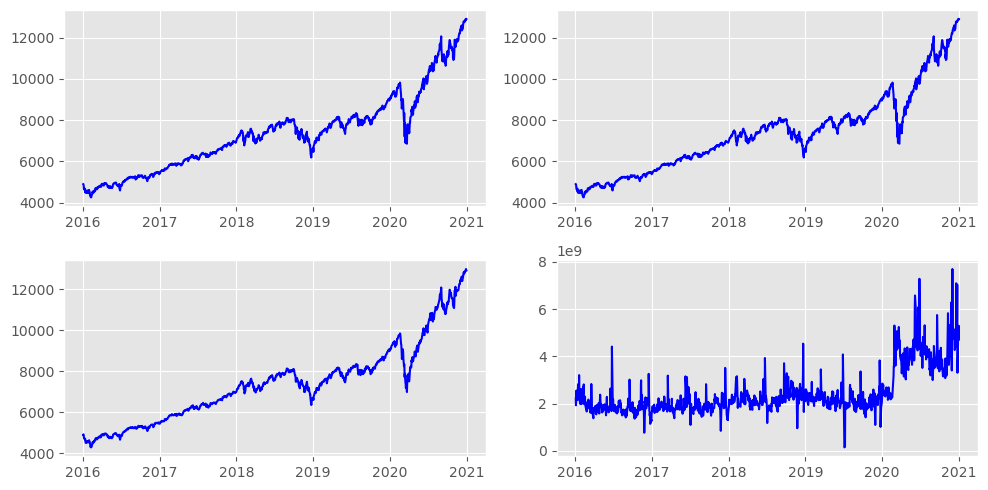

In [6]:
figure,axes = plt.subplots(2,2,figsize=(10,5))

axes[0,0].plot(train['Date'],train['Close'], color='blue')
# plt.show()

axes[0,1].plot(train['Date'],train['Adj Close'], color='blue')
# plt.show()

axes[1,0].plot(train['Date'],train['High'], color='blue')

axes[1,1].plot(train['Date'],train['Volume'], color='blue')

plt.tight_layout()

plt.show()


<AxesSubplot:>

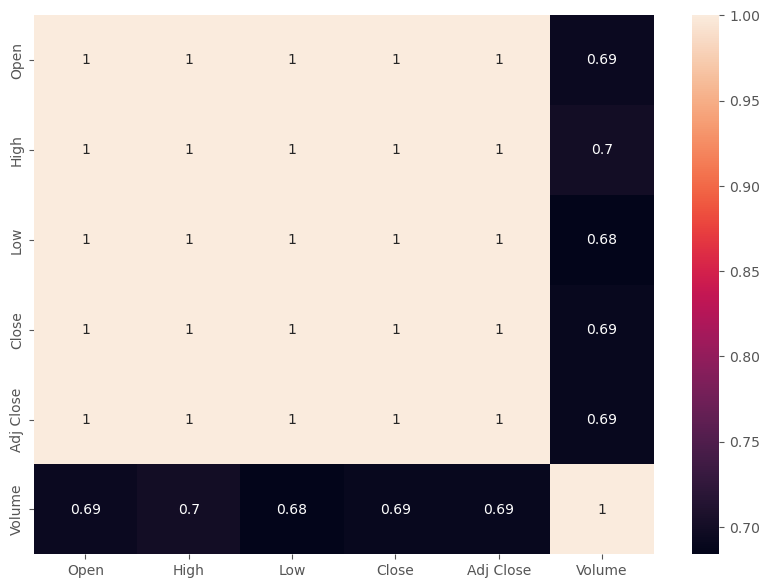

In [7]:
correlation = train.corr()

plt.figure(figsize=(10,7))

sns.heatmap(correlation, annot = True)

Through plots and through the heatmap, we can see that Open, Close, High, Low, and Adj Close are exactly correlated for obvious reasons.

In [8]:
X_train = train[:1125]
X_val = train[1125:]

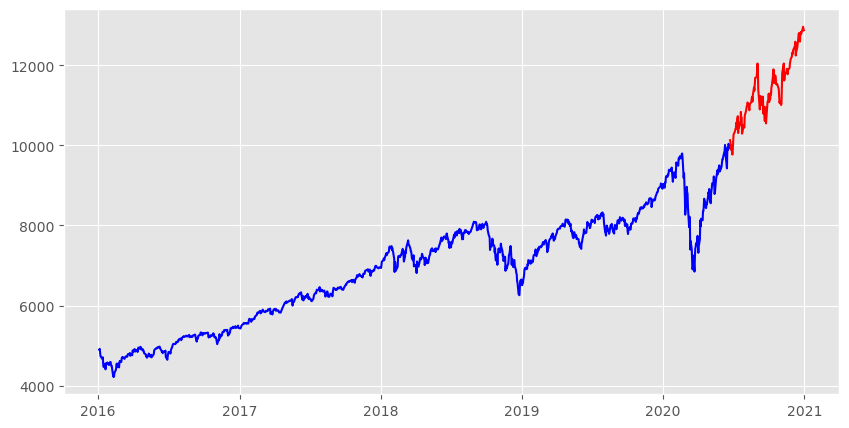

In [9]:
plt.figure(figsize=(10,5))
plt.plot(X_train['Date'],X_train['Open'],color='blue')
plt.plot(X_val['Date'],X_val['Open'],color='red')
plt.show()

<Figure size 1000x500 with 0 Axes>

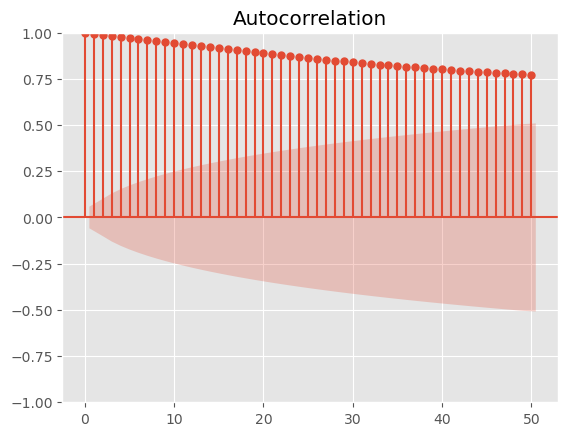

In [10]:
plt.figure(figsize=(10,5))
plot_acf(X_train['Open'],lags=50)
plt.show()

d:\Anaconda\envs\ml\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


<Figure size 1000x500 with 0 Axes>

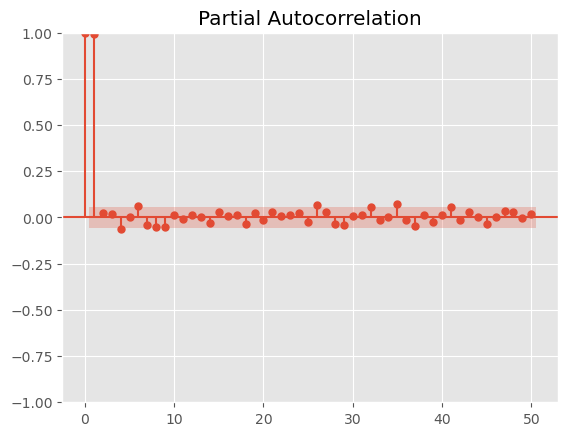

In [11]:
plt.figure(figsize=(10,5))
plot_pacf(X_train['Open'], lags=50)
plt.show()

Text(0.5, 1.0, 'NASDAQ Autocorrelation plot')

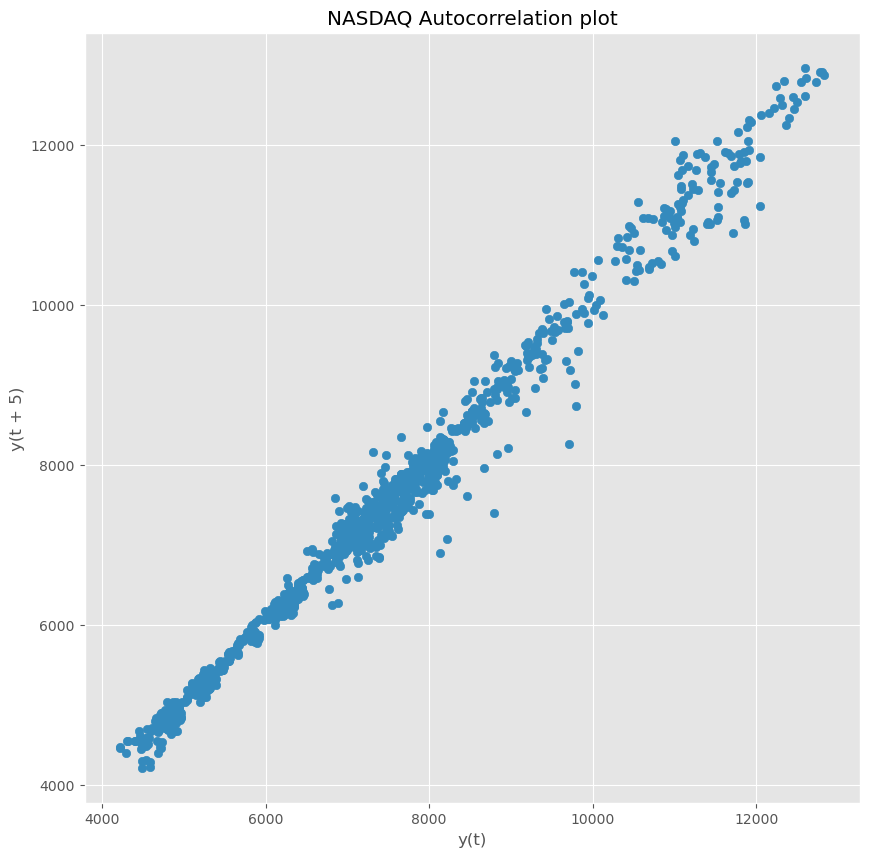

In [12]:
plt.figure(figsize=(10,10))
lag_plot(train['Open'], lag=5)
plt.title('NASDAQ Autocorrelation plot')

# Model


ARIMA model

In [13]:
import statsmodels.api as sm

In [14]:
xt = X_train['Open'].values
xv = X_val['Open'].values

In [15]:
history = [x for x in xt]


pred =list()
for t in range(len(xv)):
    model = sm.tsa.arima.ARIMA(history, order=(5,2,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    pred.append(yhat)
    obs = xv[t]
    history.append(yhat)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=9962.413122, expected=10130.830078
predicted=9979.635896, expected=10092.919922
predicted=9971.851125, expected=9899.360352
predicted=9982.393669, expected=9995.120117
predicted=9985.447706, expected=9771.719727
predicted=9989.106253, expected=9875.290039
predicted=9994.622365, expected=10063.669922
predicted=9998.639748, expected=10268.669922
predicted=10003.263756, expected=10360.379883
predicted=10007.851691, expected=10412.459961
predicted=10012.301178, expected=10409.349609
predicted=10016.868123, expected=10563.719727
predicted=10021.386570, expected=10545.910156
predicted=10025.908713, expected=10729.919922
predicted=10030.441726, expected=10310.250000
predicted=10034.965592, expected=10576.719727
predicted=10039.493290, expected=10443.870117
predicted=10044.020638, expected=10500.519531
predicted=10048.547131, expected=10526.019531
predicted=10053.074316, expected=10837.879883
predicted=10057.601170, expected=10687.580078
predicted=10062.128029, expected=10689.500000


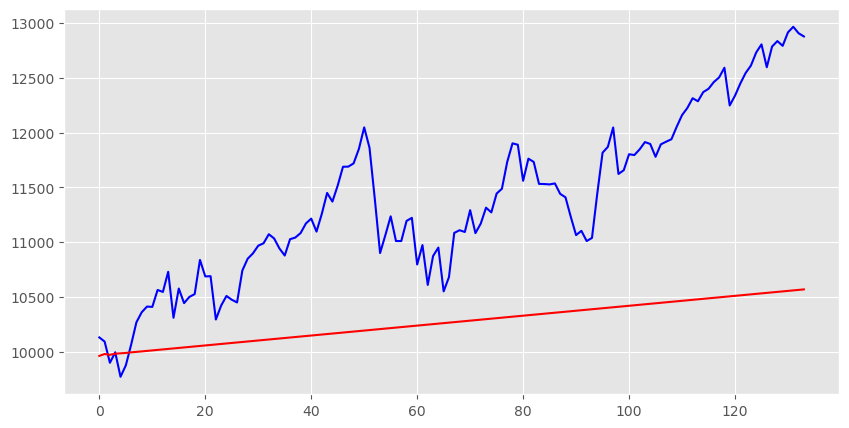

In [16]:
plt.figure(figsize=(10,5))
plt.plot(xv, color = 'blue')
plt.plot(pred, color='red')
plt.show()

In [17]:
xp = X_train[['Open', 'Date']]
xp = xp.rename(columns={'Open': 'ds', 'Date': 'y'})

In [27]:
from prophet import Prophet
model2 = Prophet(yearly_seasonality=True,seasonality_prior_scale)

In [30]:
m = Prophet()
forecast = m.fit(xp).predict(future)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ValueError: lam value too large

In [28]:
model2.fit(xp) 
future = model2.make_future_dataframe(periods=100)
model2.predict(future)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
d:\Anaconda\envs\ml\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
d:\Anaconda\envs\ml\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
d:\Anaconda\envs\ml\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


ValueError: lam value too large

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.metrics import RootMeanSquaredError, MeanAbsoluteError
from tensorflow.keras.models import Sequential

ImportError: cannot import name 'LayerNormalization' from 'tensorflow.python.keras.layers.normalization' (d:\Anaconda\lib\site-packages\tensorflow\python\keras\layers\normalization\__init__.py)

In [ ]:
def get_model(params, input_shape):
	model = Sequential()
	model.add(LSTM(units=params["lstm_units"], return_sequences=True, input_shape=(input_shape, 1)))
	model.add(Dropout(rate=params["dropout"]))

	model.add(LSTM(units=params["lstm_units"], return_sequences=True))
	model.add(Dropout(rate=params["dropout"]))

	model.add(LSTM(units=params["lstm_units"], return_sequences=True))
	model.add(Dropout(rate=params["dropout"]))

	model.add(LSTM(units=params["lstm_units"], return_sequences=False))
	model.add(Dropout(rate=params["dropout"]))

	model.add(Dense(1))

	model.compile(loss=params["loss"],
              	optimizer=params["optimizer"],
              	metrics=[RootMeanSquaredError(), MeanAbsoluteError()])

	return model

In [ ]:
params = {
	"loss": "mean_squared_error",
	"optimizer": "adam",
	"dropout": 0.2,
	"lstm_units": 90,
	"epochs": 30,
	"batch_size": 128,
	"es_patience" : 10
}

model = get_model(params=params, input_shape=xp.shape[1])

In [ ]:
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_root_mean_squared_error',
                                           	mode='min',
patience=params["es_patience"])

In [ ]:
model.fit(
	x_train,
	y_train,
	validation_data=(x_test, y_test),
	epochs=params["epochs"],
	batch_size=params["batch_size"],
	verbose=1,
	callbacks=[neptune_callback, es_callback]
)